In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


1.13.1


In [3]:
#Load Data
bos = pd.read_csv('HIGGS.csv')

In [52]:
bos.head()

x = bos[:1050000]
y = bos.as(bos[-500000:])

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

In [45]:
len(x)
len(y)

500000

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.2868990584 and adding 0.499885


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

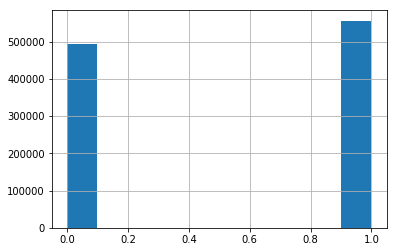

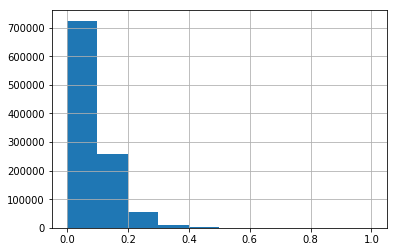

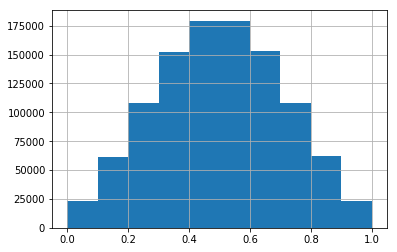

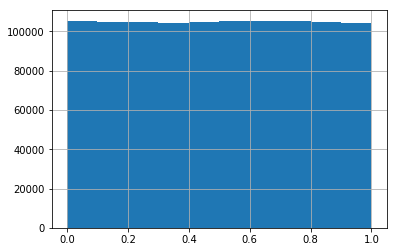

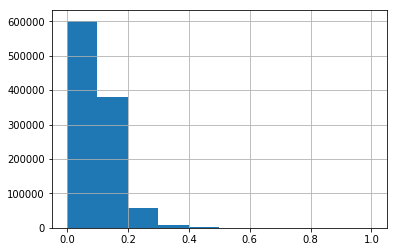

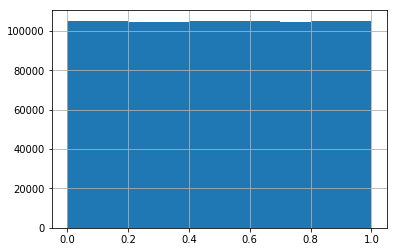

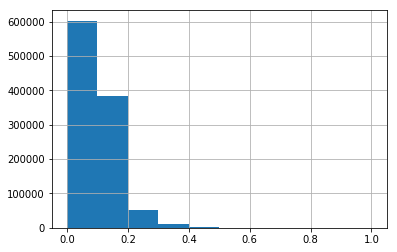

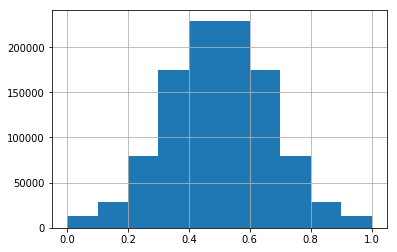

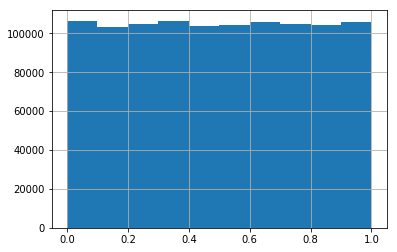

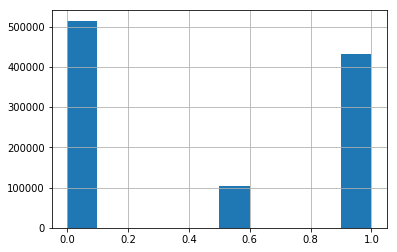

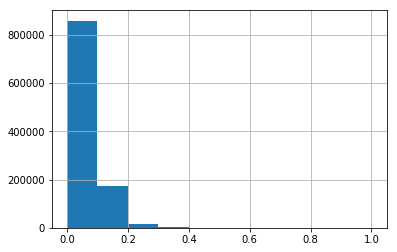

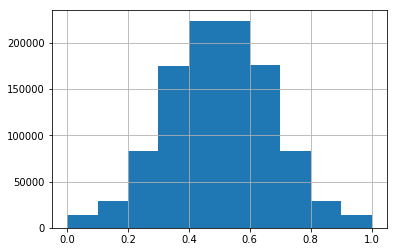

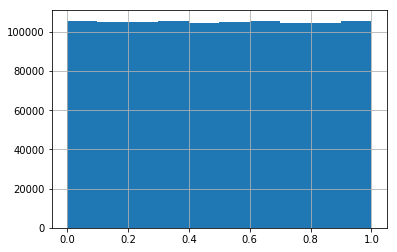

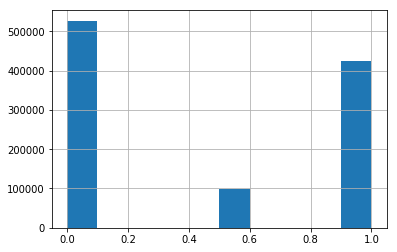

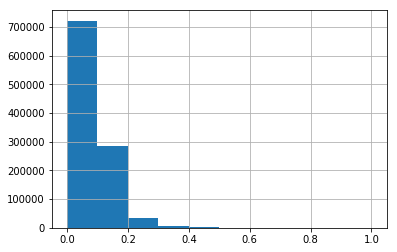

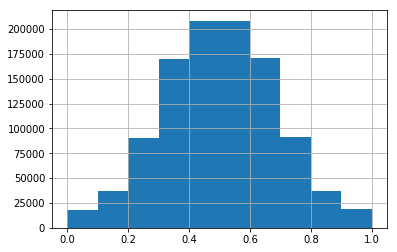

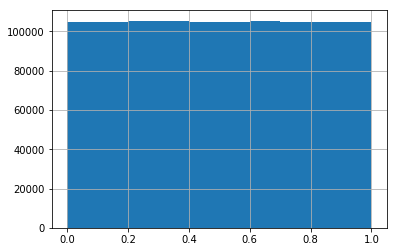

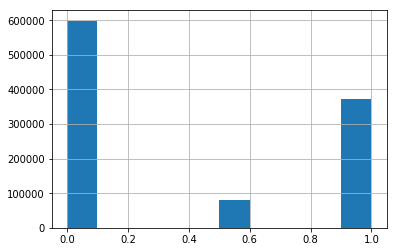

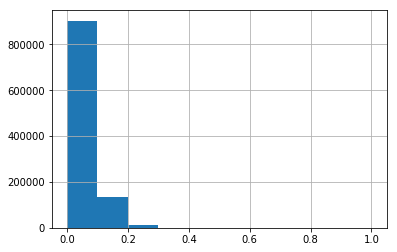

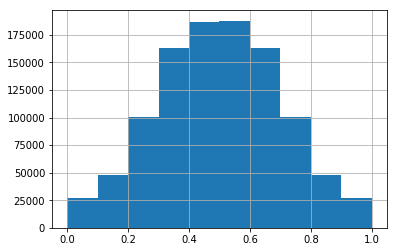

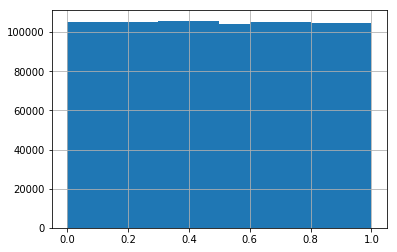

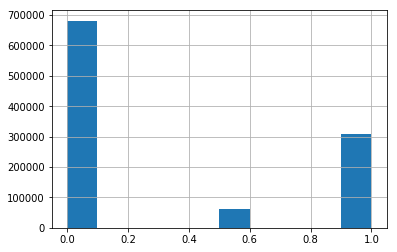

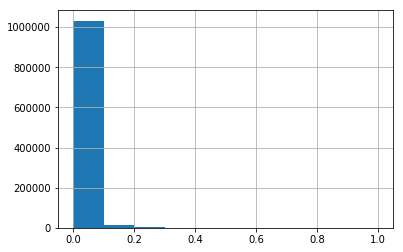

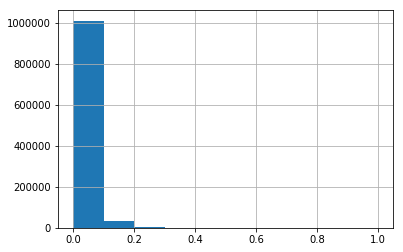

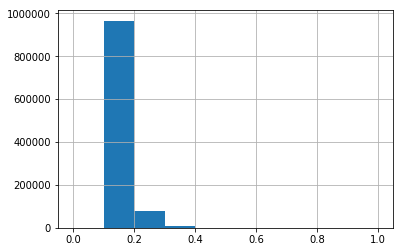

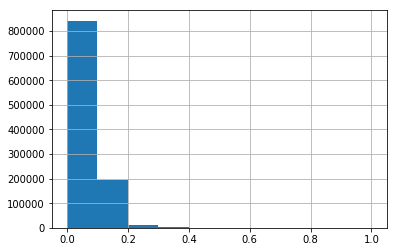

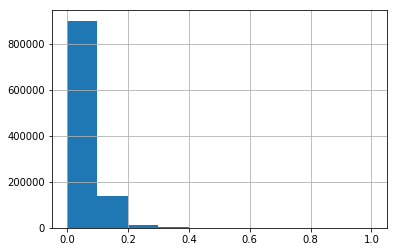

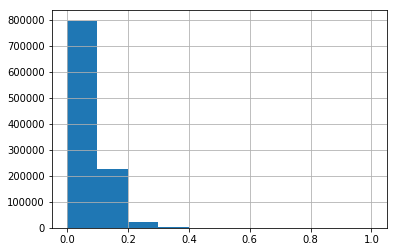

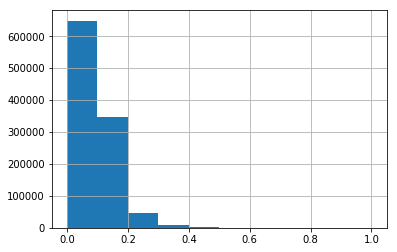

In [48]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

In [49]:
model = tf.keras.Sequential()

# 300 represents number of neurons - 5 layers
model.add(layers.Dense(300, activation='sigmoid'))
model.add(layers.Dense(300, activation='sigmoid'))
model.add(layers.Dense(300, activation='sigmoid'))
model.add(layers.Dense(300, activation='sigmoid'))
model.add(layers.Dense(300, activation='sigmoid'))
model.add(layers.Dense(1))

In [50]:
#SGD is Schocastic Gradient Descent
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [51]:
# Code is not working yet.  Need to set Target
model.fit(scaled_train_df.values, y, epochs=5, batch_size=500)

ValueError: Please provide as model targets either a single array or a list of arrays. You passed: y=          1.000000000000000000e+00  8.692932128906250000e-01  \
10499999                       0.0                  2.089598   
10500000                       1.0                  0.452032   
10500001                       1.0                  0.310383   
10500002                       0.0                  0.891071   
10500003                       0.0                  0.677317   
10500004                       1.0                  0.543537   
10500005                       0.0                  1.366163   
10500006                       1.0                  0.998681   
10500007                       1.0                  1.635369   
10500008                       0.0                  1.048825   
10500009                       1.0                  2.346360   
10500010                       0.0                  3.631999   
10500011                       0.0                  0.308004   
10500012                       0.0                  0.807619   
10500013                       1.0                  0.538230   
10500014                       1.0                  0.570988   
10500015                       0.0                  0.338933   
10500016                       0.0                  1.672703   
10500017                       0.0                  1.352986   
10500018                       1.0                  0.830495   
10500019                       0.0                  0.364920   
10500020                       1.0                  0.492294   
10500021                       1.0                  1.421249   
10500022                       1.0                  0.728742   
10500023                       1.0                  1.806300   
10500024                       0.0                  0.338933   
10500025                       0.0                  1.529956   
10500026                       0.0                  0.831410   
10500027                       1.0                  0.577394   
10500028                       1.0                  0.653159   
...                            ...                       ...   
10999969                       1.0                  0.867829   
10999970                       1.0                  0.693055   
10999971                       1.0                  2.012734   
10999972                       0.0                  0.857764   
10999973                       0.0                  0.859594   
10999974                       1.0                  1.122944   
10999975                       0.0                  0.757841   
10999976                       0.0                  1.151676   
10999977                       0.0                  1.379889   
10999978                       0.0                  0.559642   
10999979                       0.0                  0.353208   
10999980                       0.0                  0.592034   
10999981                       1.0                  0.465758   
10999982                       1.0                  0.531092   
10999983                       1.0                  0.689029   
10999984                       1.0                  0.707879   
10999985                       0.0                  0.666153   
10999986                       1.0                  0.521393   
10999987                       1.0                  0.922366   
10999988                       1.0                  0.674572   
10999989                       1.0                  2.263639   
10999990                       0.0                  0.745579   
10999991                       0.0                  1.861934   
10999992                       0.0                  1.295887   
10999993                       1.0                  1.595473   
10999994                       1.0                  1.159912   
10999995                       1.0                  0.618388   
10999996                       1.0                  0.700559   
10999997                       0.0                  1.178030   
10999998                       0.0                  0.464477   

          -6.350818276405334473e-01  2.256902605295181274e-01  \
10499999                  -0.203614                  1.064086   
10500000                  -2.093113                 -0.623908   
10500001                  -1.437632                  0.717297   
10500002                   0.091499                 -1.425682   
10500003                  -0.317568                  1.440837   
10500004                  -1.549638                 -1.310271   
10500005                   0.714839                  0.023166   
10500006                   1.477456                  0.833818   
10500007                   0.336939                 -1.646517   
10500008                  -1.049992                  0.999722   
10500009                  -0.286401                 -1.654840   
10500010                  -1.403543                 -0.778159   
10500011                  -0.057518                  1.661116   
10500012                   1.413175                  1.390899   
10500013                   0.249282                  1.743236   
10500014                  -0.782151                 -1.014530   
10500015                   0.154807                  0.359412   
10500016                  -0.477299                  0.499792   
10500017                  -0.330230                 -1.048932   
10500018                   0.022347                 -1.133271   
10500019                  -2.042466                  1.121791   
10500020                  -1.999612                  1.090719   
10500021                   1.520311                 -0.754300   
10500022                  -0.440288                 -1.374080   
10500023                  -0.876626                  0.509779   
10500024                   1.813476                  1.442501   
10500025                  -1.367506                 -1.519454   
10500026                   1.053780                  0.318352   
10500027                  -1.654827                 -0.349804   
10500028                   0.220063                  1.668330   
...                             ...                       ...   
10999969                  -0.079920                 -0.339261   
10999970                  -0.132514                  0.597447   
10999971                   0.676854                 -0.389754   
10999972                  -0.149071                 -1.051151   
10999973                   0.750876                 -0.213308   
10999974                   2.181636                 -1.659279   
10999975                  -0.476325                 -0.443576   
10999976                   0.153833                  1.080732   
10999977                  -0.928246                  1.453043   
10999978                  -1.380168                  0.283951   
10999979                   0.325251                 -0.374772   
10999980                   2.199167                  1.014148   
10999981                  -0.568852                 -1.474510   
10999982                   0.729448                 -0.824768   
10999983                  -0.558138                  1.312109   
10999984                   0.857038                  1.453043   
10999985                  -0.094529                 -0.319287   
10999986                   1.264157                 -1.417360   
10999987                  -0.263026                 -0.533463   
10999988                  -0.403277                 -0.338706   
10999989                  -1.622686                  1.012484   
10999990                   1.280715                  1.610624   
10999991                  -0.382824                 -1.608232   
10999992                   0.844377                 -0.175577   
10999993                   1.246626                 -1.321368   
10999994                   1.013847                  0.108615   
10999995                  -1.012982                  1.110139   
10999996                   0.774251                  1.520182   
10999997                   0.117796                 -1.276980   
10999998                  -0.337047                  0.229019   

          3.274700641632080078e-01  -6.899932026863098145e-01  \
10499999                  1.543738                   0.707439   
10500000                  0.677104                   0.553986   
10500001                  0.117589                  -1.005286   
10500002                  1.323160                  -1.700242   
10500003                  1.983168                   1.254752   
10500004                  2.185098                   1.597024   
10500005                  1.659198                  -0.404164   
10500006                  0.647221                   0.942661   
10500007                  0.419117                  -1.517251   
10500008                  1.115461                   1.609639   
10500009                  1.159352                  -1.472129   
10500010                  0.663729                  -0.070406   
10500011                  1.911649                  -0.398424   
10500012                  1.564531                  -1.366040   
10500013                  3.019496                  -1.032199   
10500014                  0.562376                   0.825527   
10500015                  0.784119                   1.684587   
10500016                  0.396149                  -1.660604   
10500017                  1.039557                   1.256056   
10500018                  1.408502                   1.516226   
10500019                  0.625767                  -0.093895   
10500020                  0.878760                  -0.360214   
10500021                  0.828221                   0.741461   
10500022                  0.782363                   1.262944   
10500023                  0.919943                   0.107366   
10500024                  1.410220                  -0.083584   
10500025                  0.769458                  -0.836432   
10500026                  0.486293                  -0.608624   
10500027                  0.618301                   1.514728   
10500028                  0.316674                  -0.857250   
...                            ...                        ...   
10999969                  0.764512                   1.569462   
10999970                  1.024127                  -1.458521   
10999971                  1.915291                  -0.639904   
10999972                  1.138489                  -0.273572   
10999973                  0.713165                   0.905792   
10999974                  0.774584                   0.726181   
10999975                  1.327318                   0.737853   
10999976                  1.399077                   0.358806   
10999977                  1.249777                   0.701728   
10999978                  1.055011                   1.501663   
10999979                  0.843437                  -1.663828   
10999980                  0.975492                  -0.014011   
10999981                  0.747774                  -1.635534   
10999982                  0.683311                   0.300676   
10999983                  0.524869                  -0.307796   
10999984                  0.686692                  -1.352265   
10999985                  0.872696                  -1.602628   
10999986                  1.988459                  -0.662726   
10999987                  0.706617                   1.134827   
10999988                  0.361731                  -1.091945   
10999989                  0.421123                  -0.674919   
10999990                  1.407681                  -1.290670   
10999991                  0.463761                  -1.487331   
10999992                  0.387535                   0.474692   
10999993                  0.865705                   1.532427   
10999994                  1.495524                  -0.537545   
10999995                  0.941023                  -0.379199   
10999996                  0.847112                   0.211230   
10999997                  1.864457                  -0.584370   
10999998                  0.954596                  -0.868466   

          7.542022466659545898e-01  -2.485731393098831177e-01  \
10499999                  0.641892                   0.736706   
10500000                  1.756752                  -1.134829   
10500001                  1.019222                  -1.339807   
10500002                  0.828679                  -0.524847   
10500003                  1.386384                  -1.050659   
10500004                  0.808800                  -0.785278   
10500005                  1.313647                   0.279219   
10500006                  0.657282                   2.215119   
10500007                  0.555323                  -0.129746   
10500008                  0.879979                   0.750569   
10500009                  1.139685                  -1.104132   
10500010                  1.224147                  -1.775508   
10500011                  0.527749                   0.579259   
10500012                  0.640243                   1.317971   
10500013                  0.900865                  -0.880340   
10500014                  1.966349                   0.287141   
10500015                  0.449791                  -1.150672   
10500016                  1.427790                  -1.374465   
10500017                  1.715895                  -0.687245   
10500018                  0.540025                  -0.307987   
10500019                  0.410400                  -1.451702   
10500020                  0.902423                  -0.590203   
10500021                  1.144999                  -0.057459   
10500022                  0.539933                   1.140719   
10500023                  0.326488                  -0.602085   
10500024                  0.425149                  -0.404039   
10500025                  0.870818                  -0.949656   
10500026                  0.563568                   0.534699   
10500027                  0.507412                  -2.343900   
10500028                  1.191443                   0.036613   
...                            ...                        ...   
10999969                  1.129883                  -1.368523   
10999970                  0.716735                   1.423925   
10999971                  2.612088                  -0.824887   
10999972                  0.490465                  -0.649616   
10999973                  1.503366                  -0.151531   
10999974                  1.370352                   1.145671   
10999975                  0.861199                   0.046515   
10999976                  0.800464                  -0.848652   
10999977                  1.018581                  -1.090268   
10999978                  0.761714                  -1.319012   
10999979                  1.761057                  -0.059439   
10999980                  0.969571                   0.875338   
10999981                  0.739637                   0.350516   
10999982                  1.035803                  -0.582281   
10999983                  1.377772                  -0.365420   
10999984                  0.674687                  -0.317889   
10999985                  0.498435                   0.137617   
10999986                  1.371452                  -0.176286   
10999987                  1.180817                  -0.020820   
10999988                  0.747148                   0.174255   
10999989                  0.626319                  -0.560496   
10999990                  0.710506                  -2.288447   
10999991                  1.222498                  -0.409981   
10999992                  0.842603                   1.032784   
10999993                  0.456021                   1.729906   
10999994                  2.342396                  -0.839740   
10999995                  1.004656                   0.348535   
10999996                  1.095531                   0.052457   
10999997                  0.998519                  -1.264549   
10999998                  0.430004                  -0.271348   

          -1.092063903808593750e+00  0.000000000000000000e+00  \
10499999                  -1.458506                  0.000000   
10500000                   0.024553                  0.000000   
10500001                  -0.575386                  0.000000   
10500002                   0.641019                  0.000000   
10500003                  -0.578712                  1.086538   
10500004                  -0.433463                  2.173076   
10500005                  -1.156371                  1.086538   
10500006                  -1.690235                  0.000000   
10500007                   1.579022                  0.000000   
10500008                  -0.580375                  2.173076   
10500009                  -0.175679                  0.000000   
10500010                   1.243070                  0.000000   
10500011                  -0.114143                  2.173076   
10500012                  -0.108045                  0.000000   
10500013                   0.123787                  2.173076   
10500014                  -1.702986                  2.173076   
10500015                  -0.796027                  0.000000   
10500016                  -1.273345                  0.000000   
10500017                  -0.515511                  2.173076   
10500018                   0.622170                  2.173076   
10500019                  -0.414614                  0.000000   
10500020                   1.624481                  0.000000   
10500021                  -1.363153                  1.086538   
10500022                   0.802896                  0.000000   
10500023                  -0.294869                  0.000000   
10500024                  -1.360382                  0.000000   
10500025                   0.901021                  0.000000   
10500026                   1.569043                  1.086538   
10500027                   1.665504                  0.000000   
10500028                  -1.547760                  2.173076   
...                             ...                       ...   
10999969                  -0.267705                  0.000000   
10999970                  -0.301522                  0.000000   
10999971                   1.026864                  0.000000   
10999972                   1.382219                  1.086538   
10999973                  -1.068226                  2.173076   
10999974                  -0.522718                  2.173076   
10999975                   0.384343                  2.173076   
10999976                  -1.005027                  2.173076   
10999977                  -0.545448                  2.173076   
10999978                  -1.024430                  2.173076   
10999979                  -0.502760                  0.000000   
10999980                   1.735910                  0.000000   
10999981                   0.714196                  2.173076   
10999982                  -0.980080                  0.000000   
10999983                  -1.671941                  2.173076   
10999984                   0.724175                  0.000000   
10999985                   0.256282                  2.173076   
10999986                   0.416497                  2.173076   
10999987                   0.747459                  0.000000   
10999988                  -0.052607                  0.000000   
10999989                  -0.624171                  0.000000   
10999990                   0.242977                  0.000000   
10999991                   0.209160                  1.086538   
10999992                   1.593436                  1.086538   
10999993                  -0.394657                  0.000000   
10999994                   1.320683                  0.000000   
10999995                  -1.678593                  2.173076   
10999996                   0.024553                  2.173076   
10999997                   1.276333                  0.000000   
10999998                  -1.252278                  2.173076   

                    ...             -1.045456994324922562e-02  \
10499999            ...                             -0.444355   
10500000            ...                              0.219405   
10500001            ...                             -0.747503   
10500002            ...                             -0.922396   
10500003            ...                             -1.569500   
10500004            ...                              0.928137   
10500005            ...                              0.066165   
10500006            ...                              0.965614   
10500007            ...                              0.218572   
10500008            ...                              0.996429   
10500009            ...                              0.775731   
10500010            ...                             -1.665274   
10500011            ...                              0.257715   
10500012            ...                             -0.087907   
10500013            ...                             -0.590100   
10500014            ...                             -0.768324   
10500015            ...                             -0.400216   
10500016            ...                             -0.809965   
10500017            ...                             -0.411043   
10500018            ...                             -1.855991   
10500019            ...                              2.016637   
10500020            ...                             -1.124772   
10500021            ...                              0.021193   
10500022            ...                              1.520275   
10500023            ...                             -1.639457   
10500024            ...                             -0.675048   
10500025            ...                             -0.900743   
10500026            ...                              1.827586   
10500027            ...                             -0.810798   
10500028            ...                              0.046177   
...                 ...                                   ...   
10999969            ...                              0.031187   
10999970            ...                              1.262932   
10999971            ...                             -0.291116   
10999972            ...                              0.091150   
10999973            ...                             -1.056481   
10999974            ...                              1.642700   
10999975            ...                              0.365982   
10999976            ...                              0.251885   
10999977            ...                             -0.398550   
10999978            ...                             -0.372733   
10999979            ...                             -2.372341   
10999980            ...                              0.314346   
10999981            ...                              1.328725   
10999982            ...                              0.303520   
10999983            ...                              0.629154   
10999984            ...                              0.251885   
10999985            ...                              1.051395   
10999986            ...                              0.918976   
10999987            ...                             -2.092513   
10999988            ...                             -0.759995   
10999989            ...                              0.268541   
10999990            ...                              0.554200   
10999991            ...                              2.327280   
10999992            ...                              0.237727   
10999993            ...                             -2.134987   
10999994            ...                             -0.097068   
10999995            ...                             -0.216995   
10999996            ...                              1.585235   
10999997            ...                              1.399515   
10999998            ...                             -1.652782   

          -4.576716944575309753e-02  3.101961374282836914e+00  \
10499999                  -0.046322                  3.101961   
10500000                   0.939305                  0.000000   
10500001                  -0.976357                  3.101961   
10500002                  -0.192264                  0.000000   
10500003                   0.625224                  0.000000   
10500004                  -0.234992                  0.000000   
10500005                   1.257269                  1.550981   
10500006                   0.446543                  3.101961   
10500007                  -0.087385                  0.000000   
10500008                   0.735097                  0.000000   
10500009                   1.161270                  0.000000   
10500010                   0.806126                  0.000000   
10500011                  -0.663387                  0.000000   
10500012                  -0.198368                  1.550981   
10500013                   1.618517                  0.000000   
10500014                   0.318913                  0.000000   
10500015                   0.636878                  0.000000   
10500016                   1.216761                  3.101961   
10500017                   0.680161                  3.101961   
10500018                  -1.602853                  0.000000   
10500019                   1.016437                  0.000000   
10500020                   0.503699                  3.101961   
10500021                   0.480947                  0.000000   
10500022                  -1.724934                  0.000000   
10500023                   0.823328                  0.000000   
10500024                   0.270081                  3.101961   
10500025                  -0.234437                  0.000000   
10500026                   1.318310                  0.000000   
10500027                   0.842750                  3.101961   
10500028                  -0.287154                  0.000000   
...                             ...                       ...   
10999969                   1.611858                  0.000000   
10999970                   0.268416                  0.000000   
10999971                   1.522517                  0.000000   
10999972                   0.423791                  0.000000   
10999973                  -1.586760                  0.000000   
10999974                   0.344439                  0.000000   
10999975                  -0.019131                  3.101961   
10999976                  -1.320958                  3.101961   
10999977                  -0.401466                  0.000000   
10999978                   0.959836                  3.101961   
10999979                   0.655190                  0.000000   
10999980                   0.489826                  3.101961   
10999981                   0.127468                  0.000000   
10999982                  -1.601188                  0.000000   
10999983                  -0.414783                  0.000000   
10999984                   1.618517                  0.000000   
10999985                   0.985362                  3.101961   
10999986                   1.443720                  0.000000   
10999987                  -0.123455                  0.000000   
10999988                   1.078033                  3.101961   
10999989                  -0.458067                  3.101961   
10999990                  -0.567942                  3.101961   
10999991                  -0.411454                  0.000000   
10999992                   1.665130                  0.000000   
10999993                   0.522566                  0.000000   
10999994                   1.190680                  3.101961   
10999995                   1.049177                  3.101961   
10999996                   1.713962                  0.000000   
10999997                  -1.313189                  0.000000   
10999998                  -0.586254                  0.000000   

          1.353760004043579102e+00  9.795631170272827148e-01  \
10499999                  0.812007                  1.013427   
10500000                  1.413466                  1.118543   
10500001                  1.031757                  1.084100   
10500002                  0.905891                  0.960847   
10500003                  0.310056                  0.948682   
10500004                  1.292012                  0.991667   
10500005                  0.821513                  0.921535   
10500006                  0.577960                  0.744283   
10500007                  0.909890                  0.934240   
10500008                  0.958745                  1.064610   
10500009                  1.034835                  0.855699   
10500010                  0.649974                  0.904617   
10500011                  1.175861                  1.186688   
10500012                  0.800883                  0.920995   
10500013                  1.015709                  0.755097   
10500014                  1.066822                  0.818673   
10500015                  0.871495                  0.871799   
10500016                  4.436646                  2.373093   
10500017                  0.647565                  0.874030   
10500018                  0.511576                  0.903721   
10500019                  2.122440                  1.383674   
10500020                  0.941596                  1.053396   
10500021                  0.449335                  0.943584   
10500022                  0.804384                  1.203234   
10500023                  0.858714                  1.147109   
10500024                  1.355949                  0.928575   
10500025                  0.844613                  0.820382   
10500026                  1.988808                  1.340160   
10500027                  0.940133                  0.851079   
10500028                  0.941249                  1.018569   
...                            ...                       ...   
10999969                  0.944493                  0.974477   
10999970                  0.809182                  1.020306   
10999971                  0.902636                  1.093778   
10999972                  0.955205                  0.990833   
10999973                  0.973016                  1.059963   
10999974                  0.743880                  0.831256   
10999975                  1.753768                  1.180956   
10999976                  0.832614                  0.856205   
10999977                  0.827399                  0.908412   
10999978                  1.753471                  1.054882   
10999979                  1.027856                  0.886658   
10999980                  0.906544                  1.025693   
10999981                  0.896965                  0.851697   
10999982                  0.722463                  1.077805   
10999983                  1.063373                  0.601703   
10999984                  0.676757                  1.055016   
10999985                  2.082758                  1.341768   
10999986                  0.710633                  0.784726   
10999987                  0.457268                  0.918168   
10999988                  0.842710                  0.945554   
10999989                  0.948827                  0.820148   
10999990                  4.994084                  2.633978   
10999991                  1.622553                  0.948682   
10999992                  0.225949                  0.760873   
10999993                  0.901468                  0.786123   
10999994                  0.822136                  0.766772   
10999995                  0.826829                  0.989809   
10999996                  0.337374                  0.845208   
10999997                  0.838842                  0.882890   
10999998                  0.752535                  0.740727   

          9.780761599540710449e-01  9.200048446655273438e-01  \
10499999                  0.998248                  1.547026   
10500000                  0.992085                  1.150202   
10500001                  0.984250                  0.721954   
10500002                  0.989211                  0.970373   
10500003                  0.987485                  0.852562   
10500004                  0.979468                  1.912586   
10500005                  0.984521                  1.438677   
10500006                  0.970917                  1.204730   
10500007                  0.986752                  0.991018   
10500008                  0.985151                  0.842859   
10500009                  1.004473                  0.486514   
10500010                  1.281936                  0.937904   
10500011                  1.020355                  1.031074   
10500012                  0.990993                  1.151421   
10500013                  1.056839                  1.615893   
10500014                  0.983835                  1.039732   
10500015                  0.985848                  0.554153   
10500016                  1.049397                  0.618425   
10500017                  1.436581                  1.393007   
10500018                  1.025553                  1.090853   
10500019                  0.994882                  0.835277   
10500020                  0.987003                  1.705262   
10500021                  1.466033                  2.145774   
10500022                  0.984819                  0.495757   
10500023                  1.005716                  0.603323   
10500024                  0.989433                  1.062001   
10500025                  0.983570                  0.882828   
10500026                  0.988748                  0.731093   
10500027                  0.990330                  0.869729   
10500028                  0.980848                  0.966884   
...                            ...                       ...   
10999969                  1.115873                  0.835247   
10999970                  1.121432                  0.822444   
10999971                  0.975413                  0.787962   
10999972                  0.991752                  0.856696   
10999973                  0.989977                  0.727738   
10999974                  1.081241                  0.739705   
10999975                  1.215570                  0.780304   
10999976                  1.064176                  1.323720   
10999977                  1.139007                  1.326875   
10999978                  0.987557                  0.856645   
10999979                  0.989042                  1.716835   
10999980                  0.991037                  0.702707   
10999981                  0.989382                  0.640940   
10999982                  0.986994                  1.340200   
10999983                  0.989436                  0.924626   
10999984                  0.985590                  0.902761   
10999985                  0.989222                  0.716411   
10999986                  0.987004                  2.219790   
10999987                  1.115962                  0.911163   
10999988                  0.991324                  0.999456   
10999989                  1.350876                  0.684106   
10999990                  0.992359                  0.919754   
10999991                  0.992321                  1.476622   
10999992                  0.990706                  1.063958   
10999993                  0.980619                  1.144889   
10999994                  1.002191                  1.061233   
10999995                  1.029104                  1.199679   
10999996                  0.987610                  0.883422   
10999997                  1.201380                  0.939216   
10999998                  0.986917                  0.663952   

          7.216574549674987793e-01  9.887509346008300781e-01  \
10499999                  0.938120                  1.063107   
10500000                  0.541958                  1.071358   
10500001                  0.844036                  1.282678   
10500002                  1.021332                  0.796987   
10500003                  0.447742                  1.060820   
10500004                  0.961277                  1.454123   
10500005                  1.490850                  1.291631   
10500006                  1.069906                  0.830503   
10500007                  0.861860                  0.725496   
10500008                  1.122123                  1.038682   
10500009                  0.918731                  0.912542   
10500010                  1.462122                  1.078095   
10500011                  0.879701                  0.907607   
10500012                  0.544798                  0.810262   
10500013                  0.757069                  1.001758   
10500014                  0.798227                  1.083595   
10500015                  0.734297                  0.779935   
10500016                  0.601296                  1.411498   
10500017                  1.279493                  1.487344   
10500018                  0.763066                  0.821009   
10500019                  0.878294                  0.953166   
10500020                  0.943089                  1.118356   
10500021                  2.291257                  1.740700   
10500022                  0.759207                  0.757527   
10500023                  0.860051                  1.041305   
10500024                  1.000821                  1.165265   
10500025                  0.634813                  0.595578   
10500026                  0.410691                  0.900769   
10500027                  0.739326                  0.861329   
10500028                  1.524207                  0.898488   
...                            ...                       ...   
10999969                  0.667328                  0.842156   
10999970                  0.876825                  0.984944   
10999971                  2.787725                  1.764867   
10999972                  0.720480                  0.686725   
10999973                  1.057913                  0.875585   
10999974                  1.272635                  1.014438   
10999975                  0.425264                  0.834146   
10999976                  0.608017                  0.899216   
10999977                  1.772200                  1.337061   
10999978                  1.006383                  0.904951   
10999979                  0.452510                  1.058928   
10999980                  0.905868                  0.933633   
10999981                  0.727700                  0.651407   
10999982                  0.802809                  1.115474   
10999983                  0.894199                  0.893934   
10999984                  1.253286                  0.800521   
10999985                  0.679016                  0.910709   
10999986                  0.747930                  1.359666   
10999987                  0.800597                  1.015639   
10999988                  0.958488                  0.950402   
10999989                  0.392985                  0.753937   
10999990                  0.554145                  1.942972   
10999991                  0.762673                  1.014429   
10999992                  1.389086                  0.926022   
10999993                  0.692346                  0.788754   
10999994                  0.837004                  0.860472   
10999995                  0.891481                  0.938490   
10999996                  1.888438                  1.153766   
10999997                  0.339705                  0.759070   
10999998                  0.576084                  0.541427   

          8.766783475875854492e-01  
10499999                  1.037894  
10500000                  1.025451  
10500001                  1.077402  
10500002                  0.844307  
10500003                  0.850085  
10500004                  1.345084  
10500005                  1.410939  
10500006                  0.743470  
10500007                  0.740699  
10500008                  1.118463  
10500009                  0.837872  
10500010                  1.172786  
10500011                  0.852992  
10500012                  0.824408  
10500013                  0.940461  
10500014                  0.877478  
10500015                  0.967141  
10500016                  1.167364  
10500017                  1.259885  
10500018                  0.770290  
10500019                  0.830239  
10500020                  1.139220  
10500021                  1.269679  
10500022                  0.699062  
10500023                  0.863492  
10500024                  1.757504  
10500025                  0.658969  
10500026                  0.792379  
10500027                  0.741347  
10500028                  0.774332  
...                            ...  
10999969                  0.751747  
10999970                  0.960763  
10999971                  1.555251  
10999972                  0.699905  
10999973                  0.757173  
10999974                  0.799301  
10999975                  0.752515  
10999976                  0.862053  
10999977                  1.038975  
10999978                  0.784601  
10999979                  1.703331  
10999980                  0.790772  
10999981                  0.638347  
10999982                  1.090653  
10999983                  0.753665  
10999984                  0.733582  
10999985                  0.792342  
10999986                  1.252240  
10999987                  0.853639  
10999988                  0.812123  
10999989                  0.676647  
10999990                  2.156090  
10999991                  1.134126  
10999992                  0.812035  
10999993                  0.725130  
10999994                  0.772484  
10999995                  0.865269  
10999996                  0.931279  
10999997                  0.719119  
10999998                  0.517420  

[500000 rows x 29 columns]

In [17]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [18]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])